# PyTorch. Основы: синтаксис, torch.cuda и torch.autograd

## Задание 7.1

In [2]:
import torch
import matplotlib.pyplot as plt
from torch.autograd import Variable

### Задача 1

1). Создайте два вещественных тензора: `a` размером (3, 4) и `b` размером (12,)   
2). Создайте тензор `c`, являющийся тензором `b`, но размера (2, 2, 3)  
3). Выведите первый столбец матрицы `a` с помощью индексации

In [3]:
# 1.1.1

a1 = torch.FloatTensor([[1.1, 2.2, 3.3, 4.4], 
                       [4.4, 5.5, 6.6, 7.7], 
                       [7.7, 8.8, 9.9, 1.1]])
a1.shape

torch.Size([3, 4])

In [4]:
# 1.1.2

b1 = torch.FloatTensor([1.1, 2.2, 3.3, 4.4, 5.5, 6.6, 7.7, 8.8, 9.9, 1.1, 2.2, 3.3])
b1.shape

torch.Size([12])

In [5]:
# 1.2

c1 = b1.view(2, 2, 3)
c1.shape

torch.Size([2, 2, 3])

In [6]:
# 1.3 

[row[0].item() for row in a1]

[1.100000023841858, 4.400000095367432, 7.699999809265137]

### Задача 2

1). Создайте два вещественных тензора: `a` размером (5, 2) и `b` размером (1,10)   
2). Создайте тензор `c`, являющийся тензором `b`, но размера (5, 2)  
3). Произведите все арифметические операции с тензорами `a` и `c`

In [7]:
# 2.1.1 && 2.1.2

a2 = torch.FloatTensor([[1.1, 2.2], [3.3, 4.4], [5.5, 6.6], [7.7, 8.8], [9.9, 1.1]])
b2 = torch.FloatTensor([-1.1, -2.2, -3.3, -4.4, -5.5, -6.6, -7.7, -8.8, -9.9, -1.1])

In [8]:
# 2.2

c2 = b2.view(5, 2)
print(c2)

tensor([[-1.1000, -2.2000],
        [-3.3000, -4.4000],
        [-5.5000, -6.6000],
        [-7.7000, -8.8000],
        [-9.9000, -1.1000]])


In [9]:
# 2.3

print(a2, '\n', c2)

tensor([[1.1000, 2.2000],
        [3.3000, 4.4000],
        [5.5000, 6.6000],
        [7.7000, 8.8000],
        [9.9000, 1.1000]]) 
 tensor([[-1.1000, -2.2000],
        [-3.3000, -4.4000],
        [-5.5000, -6.6000],
        [-7.7000, -8.8000],
        [-9.9000, -1.1000]])


In [10]:
print("Tensor sum: ")
temp = a2.add(c2) # tensor sum
# (a2 + c2) is an alternative way
print(temp, '\n')

print("Tensor sub: ")
temp = a2.sub(c2) # tensor subtracting
# (a2 - c2) is an alternative way
print(temp, '\n')

print("Tensor prod: ")
temp = a2.mul(c2) # tensor product
# (a2 * c2) is an alternative way
print(temp, '\n')

print("Tensor div: ")
temp = a2.div(c2) # tensor division
# (a2 / c2) is an alternative way
print(temp, '\n')

Tensor sum: 
tensor([[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]]) 

Tensor sub: 
tensor([[ 2.2000,  4.4000],
        [ 6.6000,  8.8000],
        [11.0000, 13.2000],
        [15.4000, 17.6000],
        [19.8000,  2.2000]]) 

Tensor prod: 
tensor([[ -1.2100,  -4.8400],
        [-10.8900, -19.3600],
        [-30.2500, -43.5600],
        [-59.2900, -77.4400],
        [-98.0100,  -1.2100]]) 

Tensor div: 
tensor([[-1., -1.],
        [-1., -1.],
        [-1., -1.],
        [-1., -1.],
        [-1., -1.]]) 



### Задача 3

1). Создайте тензор *целых чисел* `images` размерности (100, 200, 200, 3) (можно интерпретировать это как 100 картинок размера 200х200 с тремя цветовыми каналами, то есть 100 цветных изображений 200х200). Заполните его нулями  

2). Сделайте так, чтобы у $i$-ой по порядку картинки была нарисована белая полоса толщиной два пикселя в строках, которые соответствуют номеру картинки. Например, у 3-ей по порядку картинки белая полоска будет занимать 6 и 7 строки, у 99 - 198 и 199. Сделать белую строку можно, записав в ячейки тензора число 255 (по всем трём каналам). Выведите несколько примеров с помощью `pylot`  

3). Посчитайте среднее тензора `images` по 1-ой оси (по сути - средняя картинка), умножьте полученный тензор на 70. Нарисуйте с помощью `pyplot`, должна получиться серая картинка (при взятии среднего нужно привести тензор к float с помощью `.float()`, при отрисовке обратно к int с помощью `.int()`)

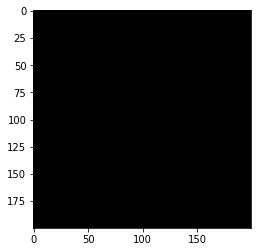

In [11]:
images = torch.IntTensor(100, 200, 200, 3).zero_()

plt.imshow(images[99])

In [12]:
for i in range(images.shape[0]):
  images[i][i * 2] = 255
  images[i][i * 2 + 1] = 255

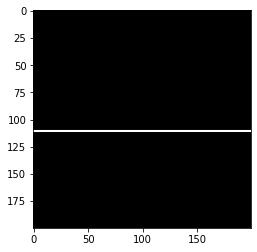

In [13]:
plt.imshow(images[55])

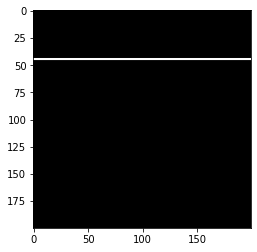

In [14]:
plt.imshow(images[22])

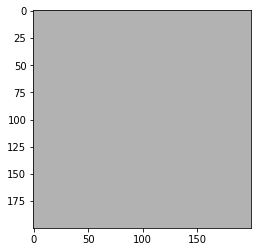

In [15]:
value = (images.float()[1].mean() * 70).item()

temp_img = images.clone()
temp_img[0] = value

temp_gray_img = temp_img[0].int()
plt.imshow(temp_gray_img)

### Задача 4

- В Colab нажмите в меню сверху: `Runtime` -> `Change Runtime Type` -> `GPU`, где изначально стоит `None` (`Среда выполнение` - `Сменить среду выполнения`)
- Объявите тензор `a` размера (2, 3, 4) и тензор `b` размера (1, 8, 3) на GPU, иницилизируйте их случайно равномерно (`.uniform_()`)
- Затем измените форму тензора `b`, чтобы она совпадала с формой тензора `a`, получите тензор `c`  
- Переместите `c` на CPU, переместите `a` на CPU  
- Оберните их в `Variable()`
- Объявите тензор `L = torch.mean((c - a) `**` 2)` и посчитайте градиент `L` по `c` ( то есть $\frac{\partial{L}}{\partial{c}})$
- Выведите градиент `L` по `c`

In [16]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

a4 = torch.FloatTensor(2, 3, 4).uniform_().to(device)
b4 = torch.FloatTensor(1, 8, 3).uniform_().to(device)

In [19]:
# b4

tensor([[[0.4647, 0.9651, 0.8865],
         [0.1757, 0.8433, 0.4014],
         [0.8461, 0.9389, 0.1305],
         [0.2956, 0.0837, 0.3652],
         [0.8515, 0.1958, 0.8621],
         [0.3942, 0.8353, 0.6456],
         [0.5609, 0.8920, 0.8954],
         [0.6439, 0.3612, 0.7264]]], device='cuda:0')

In [20]:
c4 = b4.view(a4.shape)
c4.shape

torch.Size([2, 3, 4])

In [21]:
a4 = a4.to('cpu')
c4 = c4.to('cpu')

In [22]:
#a4

tensor([[[0.9024, 0.7408, 0.4362, 0.3656],
         [0.2950, 0.4499, 0.7788, 0.2114],
         [0.8451, 0.0977, 0.9136, 0.4238]],

        [[0.1696, 0.1588, 0.8418, 0.3253],
         [0.5969, 0.8586, 0.0465, 0.4468],
         [0.0791, 0.2586, 0.9660, 0.2390]]])

In [23]:
a4 = Variable(a4, requires_grad=True)
c4 = Variable(c4, requires_grad=True)

In [24]:
l = torch.mean((c4 - a4) ** 2)
l.backward()

In [25]:
c4.grad

tensor([[[-0.0365,  0.0187,  0.0375, -0.0158],
         [ 0.0457, -0.0040,  0.0056,  0.0606],
         [-0.0595,  0.0165, -0.0692, -0.0049]],

        [[ 0.0568,  0.0031,  0.0017,  0.0057],
         [ 0.0199, -0.0177,  0.0429,  0.0371],
         [ 0.0680,  0.0321, -0.0504,  0.0406]]])